In [1]:
%ls

 El volumen de la unidad C es OS
 El n£mero de serie del volumen es: 28A3-2B7F

 Directorio de C:\Users\luisn\OneDrive\Documents\GitHub\IAA\Reto - Oscar

19/08/2025  05:38 p. m.    <DIR>          .
19/08/2025  05:13 p. m.    <DIR>          ..
19/08/2025  05:16 p. m.    <DIR>          .ipynb_checkpoints
19/08/2025  05:38 p. m.            74,926 SF_Housing.ipynb
19/08/2025  05:14 p. m.           856,650 sf_housing_dirty.csv
               2 archivos        931,576 bytes
               3 dirs  180,050,100,224 bytes libres


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("sf_housing_dirty.csv")

In [4]:
parsed = pd.to_datetime(df['date'] + ' 2024',errors="coerce")
print("Min date:", parsed.min())
print("Max date:", parsed.max())

Min date: 2024-09-30 00:00:00
Max date: 2024-10-01 00:00:00


In [5]:
df.head()

,date,title,link,price,brs,sqft,hood,bath,amenities
0,Oct 1,"3D Virtual Tour - 2 BR, 2 BA Condo 966 Sq. Ft....",https://sfbay.craigslist.org/sfc/apa/d/san-fra...,"$3,850",2.0,966.0,Mission Bay,2Ba,"['condo', 'w/d in unit', 'attached garage']"
1,Oct 1,Beautiful house for rent,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,900,1.0,NaN,portola district,0Ba,['house']
2,Oct 1,4 BEDROOM APARTMENT IN THE HAIGHT,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,4995,4.0,NaN,haight ashbury,2Ba,"['apartment', 'w/d in unit', 'street parking']"
3,Oct 1,4 BEDROOM APARTMENT IN THE HAIGHT,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,4995,4.0,NaN,haight ashbury,2Ba,"['apartment', 'w/d in unit', 'street parking']"
4,Oct 1,ENJOY GOLDEN GATE PARK EVERYDAY,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2800,2.0,700.0,USF / panhandle,1Ba,"['apartment', 'laundry in bldg', 'no smoking',..."


In [6]:
df.describe()

,brs,sqft
count,2476.000000,1461.000000
mean,1.836430,1202.036277
std,0.948098,1316.612823
min,1.000000,110.000000
25%,1.000000,650.000000
50%,2.000000,902.000000
75%,2.000000,1240.000000
max,7.000000,11020.000000


In [7]:
df.head()

,date,title,link,price,brs,sqft,hood,bath,amenities
0,Oct 1,"3D Virtual Tour - 2 BR, 2 BA Condo 966 Sq. Ft....",https://sfbay.craigslist.org/sfc/apa/d/san-fra...,"$3,850",2.0,966.0,Mission Bay,2Ba,"['condo', 'w/d in unit', 'attached garage']"
1,Oct 1,Beautiful house for rent,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,900,1.0,NaN,portola district,0Ba,['house']
2,Oct 1,4 BEDROOM APARTMENT IN THE HAIGHT,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,4995,4.0,NaN,haight ashbury,2Ba,"['apartment', 'w/d in unit', 'street parking']"
3,Oct 1,4 BEDROOM APARTMENT IN THE HAIGHT,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,4995,4.0,NaN,haight ashbury,2Ba,"['apartment', 'w/d in unit', 'street parking']"
4,Oct 1,ENJOY GOLDEN GATE PARK EVERYDAY,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2800,2.0,700.0,USF / panhandle,1Ba,"['apartment', 'laundry in bldg', 'no smoking',..."


In [8]:
df.dtypes

date          object
title         object
link          object
price         object
brs          float64
sqft         float64
hood          object
bath          object
amenities     object
dtype: object

In [9]:
if df["price"].dtype == object:
    df["price"] = df["price"].replace('[\$,]','',regex=True).astype(float)

In [ ]:
#alternativa
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(float)

In [10]:
df.describe()

,price,brs,sqft
count,3093.000000,2476.000000,1461.000000
mean,3318.156159,1.836430,1202.036277
std,1710.975464,0.948098,1316.612823
min,1.000000,1.000000,110.000000
25%,2395.000000,1.000000,650.000000
50%,2995.000000,2.000000,902.000000
75%,3933.000000,2.000000,1240.000000
max,29000.000000,7.000000,11020.000000


In [11]:
df.head()

,date,title,link,price,brs,sqft,hood,bath,amenities
0,Oct 1,"3D Virtual Tour - 2 BR, 2 BA Condo 966 Sq. Ft....",https://sfbay.craigslist.org/sfc/apa/d/san-fra...,3850.0,2.0,966.0,Mission Bay,2Ba,"['condo', 'w/d in unit', 'attached garage']"
1,Oct 1,Beautiful house for rent,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,900.0,1.0,NaN,portola district,0Ba,['house']
2,Oct 1,4 BEDROOM APARTMENT IN THE HAIGHT,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,4995.0,4.0,NaN,haight ashbury,2Ba,"['apartment', 'w/d in unit', 'street parking']"
3,Oct 1,4 BEDROOM APARTMENT IN THE HAIGHT,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,4995.0,4.0,NaN,haight ashbury,2Ba,"['apartment', 'w/d in unit', 'street parking']"
4,Oct 1,ENJOY GOLDEN GATE PARK EVERYDAY,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2800.0,2.0,700.0,USF / panhandle,1Ba,"['apartment', 'laundry in bldg', 'no smoking',..."


In [12]:
df[df["price"]==1]

,date,title,link,price,brs,sqft,hood,bath,amenities
6,Oct 1,***Private bedroom available in NoPa home. Ren...,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,1.0,5.0,NaN,NaN,2Ba,['house']


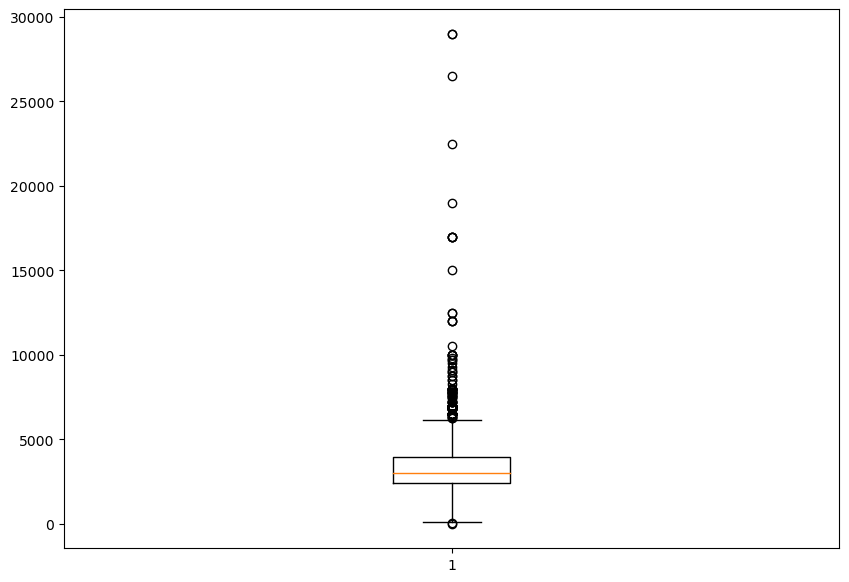

In [13]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize =(10, 7))

plt.boxplot(df["price"])
plt.show()

In [15]:
df["price"].sort_values()

6           1.0
2029       75.0
1569      100.0
1683      150.0
2153      199.0
         ...   
1933    19000.0
1926    22500.0
1523    26500.0
1541    29000.0
1922    29000.0
Name: price, Length: 3093, dtype: float64

In [16]:
df = df[df["price"]>700]

In [17]:
df.head()

,date,title,link,price,brs,sqft,hood,bath,amenities
0,Oct 1,"3D Virtual Tour - 2 BR, 2 BA Condo 966 Sq. Ft....",https://sfbay.craigslist.org/sfc/apa/d/san-fra...,3850.0,2.0,966.0,Mission Bay,2Ba,"['condo', 'w/d in unit', 'attached garage']"
1,Oct 1,Beautiful house for rent,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,900.0,1.0,NaN,portola district,0Ba,['house']
2,Oct 1,4 BEDROOM APARTMENT IN THE HAIGHT,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,4995.0,4.0,NaN,haight ashbury,2Ba,"['apartment', 'w/d in unit', 'street parking']"
3,Oct 1,4 BEDROOM APARTMENT IN THE HAIGHT,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,4995.0,4.0,NaN,haight ashbury,2Ba,"['apartment', 'w/d in unit', 'street parking']"
4,Oct 1,ENJOY GOLDEN GATE PARK EVERYDAY,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2800.0,2.0,700.0,USF / panhandle,1Ba,"['apartment', 'laundry in bldg', 'no smoking',..."


In [18]:
df["price"].min()

725.0

In [19]:
df['bath'].unique()

array(['2Ba', '0Ba', '1Ba', '1.5Ba', '2.5Ba', nan, '3Ba', 'splitBa',
       '3.5Ba', 'sharedBa', '5.5Ba', '4Ba', '4.5Ba'], dtype=object)

In [20]:
df["Shared_bath"] = df["bath"].str.contains("Shared",case=False, na=False).astype(int)
df["bath_num"] = df["bath"].replace('[^0-9\.]','',regex=True)
df["bath_num"] = pd.to_numeric(df["bath_num"],errors="coerce")
df["bath_num"].head()

0    2.0
1    0.0
2    2.0
3    2.0
4    1.0
Name: bath_num, dtype: float64

In [22]:
df["bath_num"].isnull().sum()

101

In [23]:
df.describe()

,price,brs,sqft,Shared_bath,bath_num
count,3085.000000,2471.000000,1461.000000,3085.000000,2984.000000
mean,3325.981524,1.834885,1202.036277,0.004862,1.295744
std,1706.216517,0.946041,1316.612823,0.069571,0.531052
min,725.000000,1.000000,110.000000,0.000000,0.000000
25%,2395.000000,1.000000,650.000000,0.000000,1.000000
50%,2999.000000,2.000000,902.000000,0.000000,1.000000
75%,3943.000000,2.000000,1240.000000,0.000000,1.500000
max,29000.000000,7.000000,11020.000000,1.000000,5.500000


In [26]:
if "sqft" in df.columns: #Remueve los datos que son NaN haciendo que no pete el código
    df['price_per_sqft'] = df['price'] / df['sqft']
df.head()

,date,title,link,price,brs,sqft,hood,bath,amenities,Shared_bath,bath_num,price_per_sqft
0,Oct 1,"3D Virtual Tour - 2 BR, 2 BA Condo 966 Sq. Ft....",https://sfbay.craigslist.org/sfc/apa/d/san-fra...,3850.0,2.0,966.0,Mission Bay,2Ba,"['condo', 'w/d in unit', 'attached garage']",0,2.0,3.985507
1,Oct 1,Beautiful house for rent,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,900.0,1.0,NaN,portola district,0Ba,['house'],0,0.0,NaN
2,Oct 1,4 BEDROOM APARTMENT IN THE HAIGHT,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,4995.0,4.0,NaN,haight ashbury,2Ba,"['apartment', 'w/d in unit', 'street parking']",0,2.0,NaN
3,Oct 1,4 BEDROOM APARTMENT IN THE HAIGHT,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,4995.0,4.0,NaN,haight ashbury,2Ba,"['apartment', 'w/d in unit', 'street parking']",0,2.0,NaN
4,Oct 1,ENJOY GOLDEN GATE PARK EVERYDAY,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2800.0,2.0,700.0,USF / panhandle,1Ba,"['apartment', 'laundry in bldg', 'no smoking',...",0,1.0,4.000000


In [27]:
df['hood'].unique()

array(['Mission Bay', 'portola district', 'haight ashbury',
       'USF / panhandle', 'SOMA / south beach', 'inner richmond',
       'lower haight', 'mission district', 'Glen Park',
       'richmond / seacliff', 'Eureka Valley', 'South of Market',
       'lower nob hill', 'castro / upper market', 'marina / cow hollow',
       'inner sunset / UCSF', 'hayes valley', 'potrero hill',
       'sunset / parkside', 'western addition', 'russian hill',
       'Pacific Heights', 'alamo square / nopa',
       'north beach / telegraph hill', 'downtown / civic / van ness',
       'pacific heights', 'bernal heights', 'San Francisco', 'noe valley',
       'nob hill', 'Nob Hill', 'North Panhandle', 'lower pac hts',
       'Lower Pacific Heights', 'financial district',
       'ingleside / SFSU / CCSF', 'Van Ness Corridor / Lower Nob Hill',
       nan, 'cole valley / ashbury hts', 'bayview', 'tenderloin',
       'excelsior / outer mission', 'Curtis Park (Heart of Sacramento)',
       'laurel hts / presid

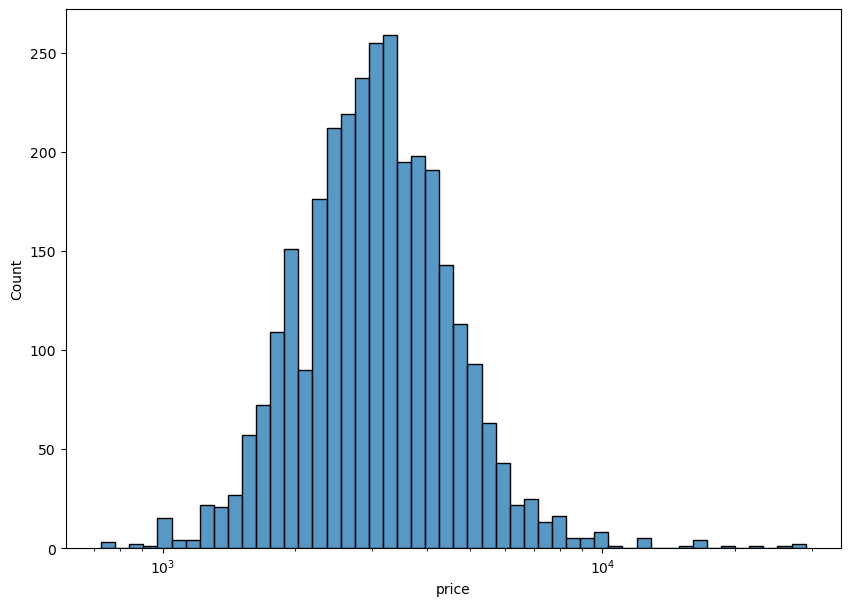

In [30]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize =(10, 7))

sns.histplot(df["price"], bins=50, log_scale=True) # Custom bin edges
plt.show()

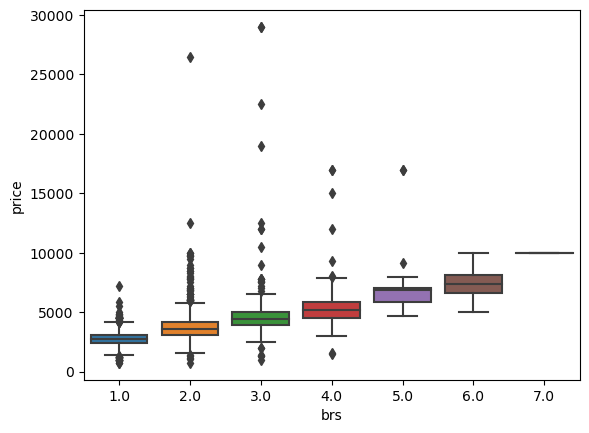

In [33]:
sns.boxplot(x="brs", y="price",data=df)
plt.show()

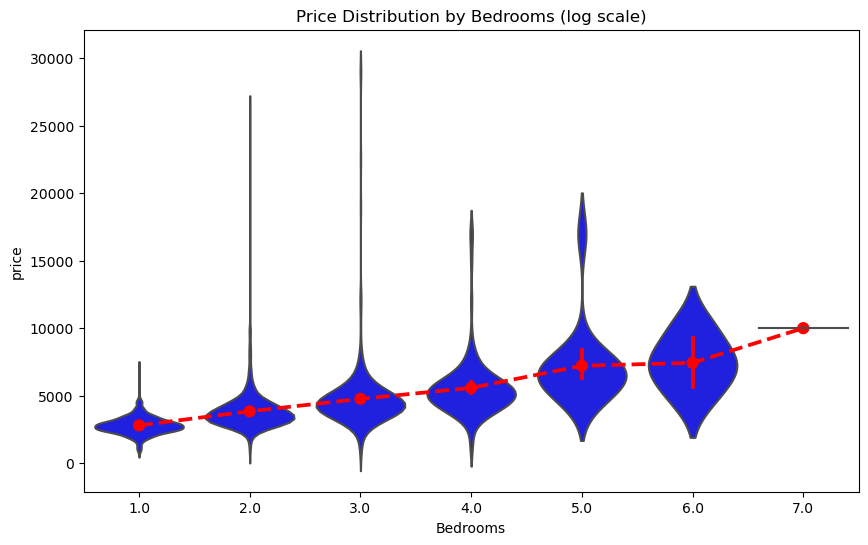

In [40]:
plt.figure(figsize=(10,6))
sns.violinplot(x="brs", y="price",data=df, inner=None, color="b",scale="width")
sns.pointplot(x="brs",y="price",data=df,estimator="mean",color="red",markers="o",linestyles="--")
plt.title("Price Distribution by Bedrooms (log scale)")
plt.xlabel("Bedrooms")
plt.ylabel("price")
plt.show()

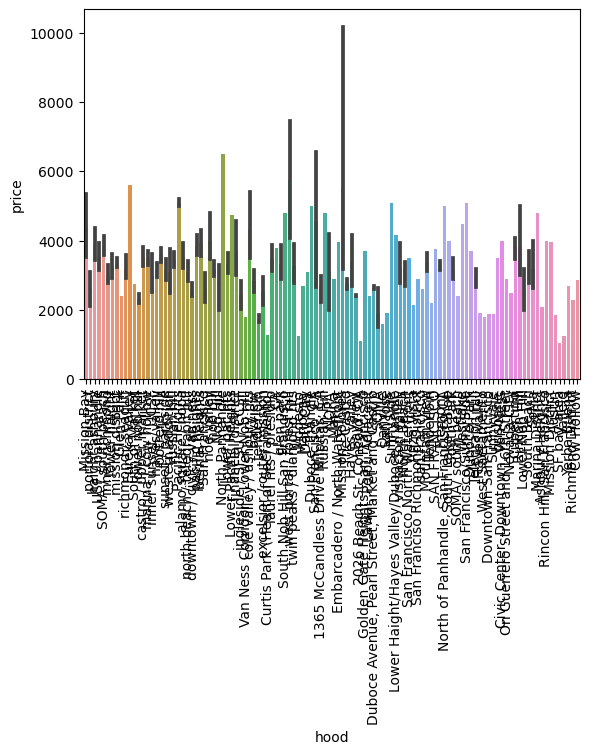

In [43]:
sns.barplot(x="hood",y="price",data=df)
plt.xticks(rotation=90) #ALINEA EL NOMBRE DE LOS BARRIOS
plt.show()

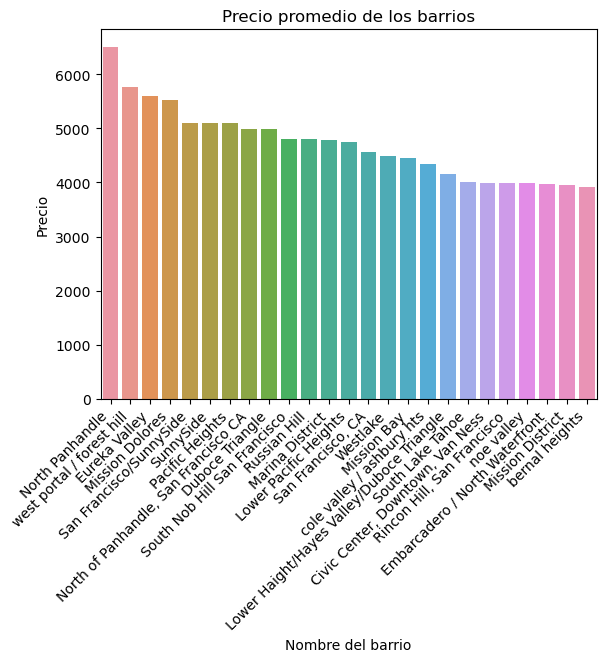

In [45]:
hood_prices = df.groupby("hood")["price"].mean().sort_values(ascending=False).head(25)
sns.barplot(x=hood_prices.index, y=hood_prices.values)
plt.xticks(rotation=45, ha="right")
plt.title("Precio promedio de los barrios")
plt.xlabel("Nombre del barrio")
plt.ylabel("Precio")
plt.show()

In [50]:
top_p_p_hd = df.sort_values(by="price",ascending=False).head(25)
top_p_p_hd['hood'].unique()
top_p_p_hd['hood'].value_counts()

hood
SOMA / south beach              8
pacific heights                 3
alamo square / nopa             2
nob hill                        2
noe valley                      1
cole valley / ashbury hts       1
inner sunset / UCSF             1
richmond / seacliff             1
Mission Dolores                 1
north beach / telegraph hill    1
russian hill                    1
marina / cow hollow             1
financial district              1
potrero hill                    1
Name: count, dtype: int64

In [51]:
top_p_p_hd = df.sort_values(by="price_per_sqft",ascending=False).head(25)
top_p_p_hd['hood'].unique()
top_p_p_hd['hood'].value_counts()

hood
SOMA / south beach            11
lower nob hill                 4
ingleside / SFSU / CCSF        2
nob hill                       2
inner sunset / UCSF            1
Rincon Hill, San Francisco     1
russian hill                   1
bernal heights                 1
noe valley                     1
castro / upper market          1
Name: count, dtype: int64

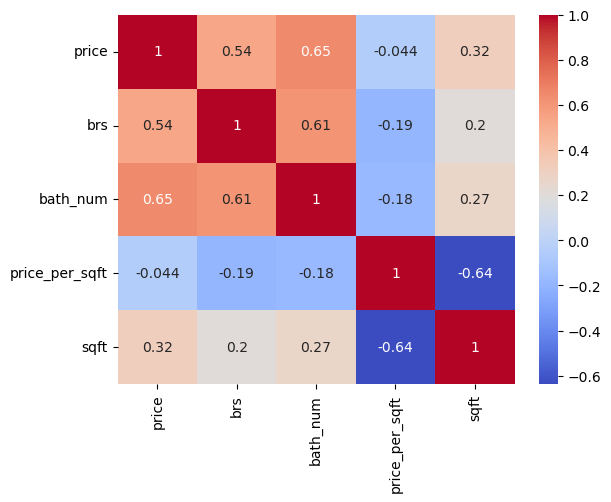

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["price","brs","bath_num","price_per_sqft","sqft"]
num_cols = [col for col in num_cols if col in df.columns]
corr = df[num_cols].corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [54]:
############################################
#Modelo, hacer mapas interactivos

C:\Users\luisn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


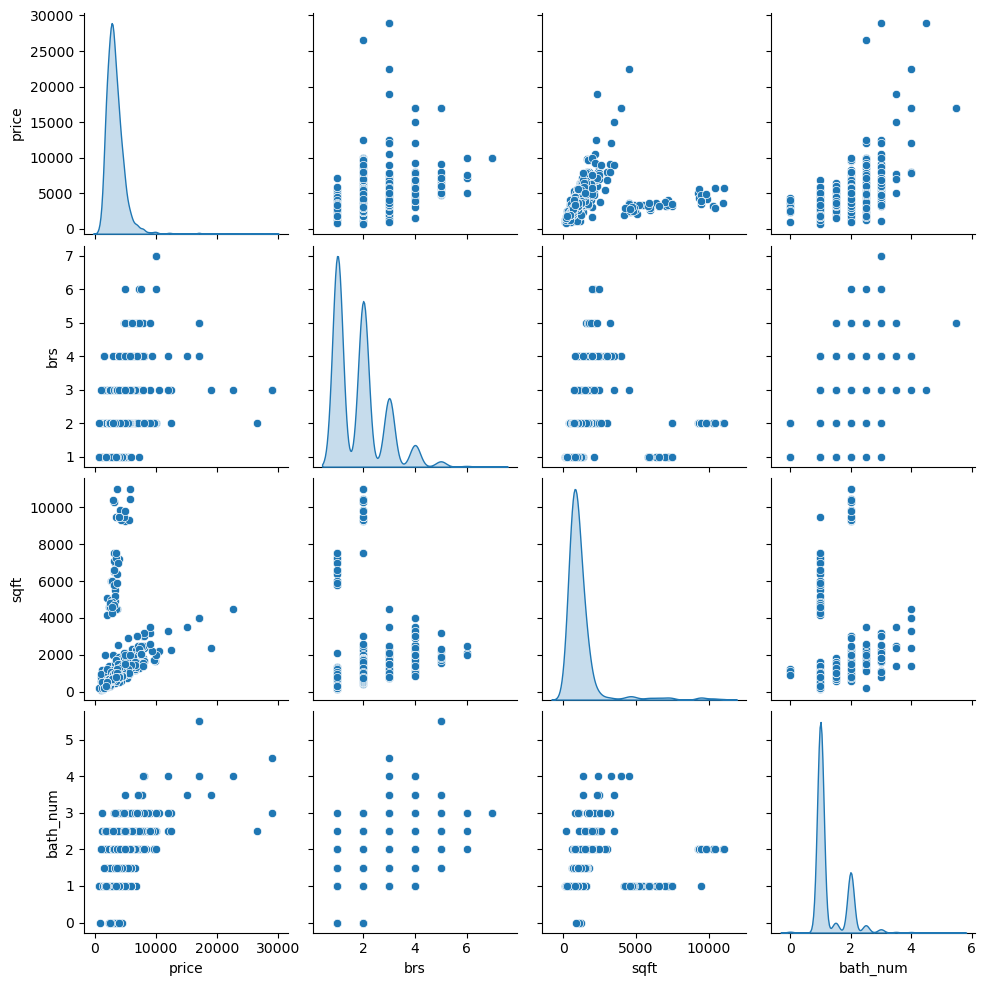

In [55]:
sns.pairplot(df[["price", "brs", "sqft", "bath_num"]], diag_kind="kde")
